In [64]:
import sys; sys.path.append("../.."); sys.path.append("../../src/")
import plantbox as pb
import pickle

import matplotlib.pyplot as plt
import numpy as np
import os
from structural.Plant import PlantPython
import pandas as pd
import copy

genotypes = ['B', 'D', 'E']
for g in genotypes:
    directory = "./results/part1/"+g
    os.makedirs(directory, exist_ok=True)
for g in genotypes:
    directory = "./results/part1/vtp/"+g
    os.makedirs(directory, exist_ok=True)



subtypes = 5
years = 50
ages = [i+1 for i in range(50)]

In [58]:
def compaireOutPuts(genotype):
            
    with open('./measurements'+ genotype +'InitXX.pkl','rb') as f:
        xx = pickle.load(f)
            
    with open('./measurements'+ genotype +'Init.pkl','rb') as f:
        temp = pickle.load(f)
        obs_mean = temp['mean']
        obs_sd = temp['sd']
        
    with open('./outputSim'+ genotype +'.pkl','rb') as f:
        output = pickle.load(f)
        nums = [[[out['year'+str(year+1)]['num'][st] for year in range(50)] for st in range(6)] for out in output]
    
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    for st, ax in enumerate(axs.flat):
        if st < 5:
            obs_age = [1, 2, 50]
            y = np.array([obs_mean['year' + str(y)]['num'][st] for y in obs_age])
            error = np.array([obs_sd['year' + str(y)]['num'][st] for y in obs_age]) #obs_sd['num'][st]
            #axs[gid].plot(x, y, label = st + 1)
            ax.fill_between(obs_age, y - error, y + error, color='blue', alpha=0.1, label = 'obs')
            for _, num in enumerate(nums):
                if _ == 0:
                    ax.plot(ages, num[st], color='black', label = 'sim')
                else:
                    ax.plot(ages, num[st], color='black')
            ax.legend()
            ax.grid()
            ax.set_xlim(right=2.5)
            ax.set_title(st+1)
        else:
            ax.axis('off')
    fig.suptitle('Number of roots per order--2yrs', fontsize=16)
    plt.tight_layout()
    plt.savefig("./results/part1/"+genotype+"/Num2.jpg")
    plt.show()
    
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    for st, ax in enumerate(axs.flat):
        if st < 5:
            obs_age = [1, 2, 50]
            y = np.array([obs_mean['year' + str(y)]['num'][st] for y in obs_age])
            error = np.array([obs_sd['year' + str(y)]['num'][st] for y in obs_age]) #obs_sd['num'][st]
            #axs[gid].plot(x, y, label = st + 1)
            ax.fill_between(obs_age, y - error, y + error, color='blue', alpha=0.1, label = 'obs')
            for _, num in enumerate(nums):
                if _ == 0:
                    ax.plot(ages, num[st], color='black', label = 'sim')
                else:
                    ax.plot(ages, num[st], color='black')
            ax.legend()
            ax.grid()
            ax.set_title(st+1)
        else:
            ax.axis('off')
    fig.suptitle('Number of roots per order--50yrs', fontsize=16)
    plt.tight_layout()
    plt.savefig("./results/part1/"+genotype+"/Num50.jpg")
    plt.show()
    lengths = [[[out['year'+str(year+1)]['length'][st-1] for year in range(50)] for st in range(1,subtypes)] for out in output]
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    for st, ax in enumerate(axs.flat):
        obs_age = [1, 2]
        y = np.array([obs_mean['year' + str(y)]['length'][st] for y in obs_age])
        error =  np.array([obs_sd['year' + str(y)]['length'][st] for y in obs_age])
        #axs[gid].plot(x, y, label = st + 1)
        ax.fill_between([1, 2], y - error, y + error, color='blue', alpha=0.1, label = 'obs')
        for _, length in enumerate(lengths):
            if _ == 0:
                ax.plot(ages, length[st], color='black', label = 'sim')
            else:
                ax.plot(ages, length[st], color='black')
        ax.legend()
        ax.set_xlim(right=2.5)
        ax.grid()
        ax.set_title(st+2)
    fig.suptitle('Total root length per order--2yrs', fontsize=16)
    plt.tight_layout()
    plt.savefig("./results/part1/"+genotype+"/Len2.jpg")
    plt.show()
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    for st, ax in enumerate(axs.flat):
        obs_age = [1, 2]
        y = np.array([obs_mean['year' + str(y)]['length'][st] for y in obs_age])
        error =  np.array([obs_sd['year' + str(y)]['length'][st] for y in obs_age])
        #axs[gid].plot(x, y, label = st + 1)
        ax.fill_between([1, 2], y - error, y + error, color='blue', alpha=0.1, label = 'obs')
        for _, length in enumerate(lengths):
            if _ == 0:
                ax.plot(ages, length[st], color='black', label = 'sim')
            else:
                ax.plot(ages, length[st], color='black')
        ax.legend()
        ax.grid()
        ax.set_title(st+2)
    fig.suptitle('Total root length per order--50yrs', fontsize=16)
    plt.tight_layout()
    plt.savefig("./results/part1/"+genotype+"/Len50.jpg")
    plt.show()
    
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    for st, order in enumerate(['main', 'sub', 'subsub']):        
        mean_kde = obs_mean['year50']['kde_' + order]
        std_kde = obs_sd['year50']['kde_' +order] 
        # axs[st].plot(xx[order],mean_kde, label='obs', linewidth=2)
        axs[st].fill_between(xx[order], mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3)
        for _, out in enumerate(output):
            if _ == 0:
                axs[st].plot(xx[order], out['year50']['kde_' + order],  color='black', label = 'sim')
            else:
                axs[st].plot(xx[order], out['year50']['kde_' + order],  color='black')
        axs[st].grid()
        axs[st].set_title(order)
    fig.suptitle('Survival probability', fontsize=16)
    plt.tight_layout()
    plt.savefig("./results/part1/"+genotype+"/Density.jpg")
    plt.show()

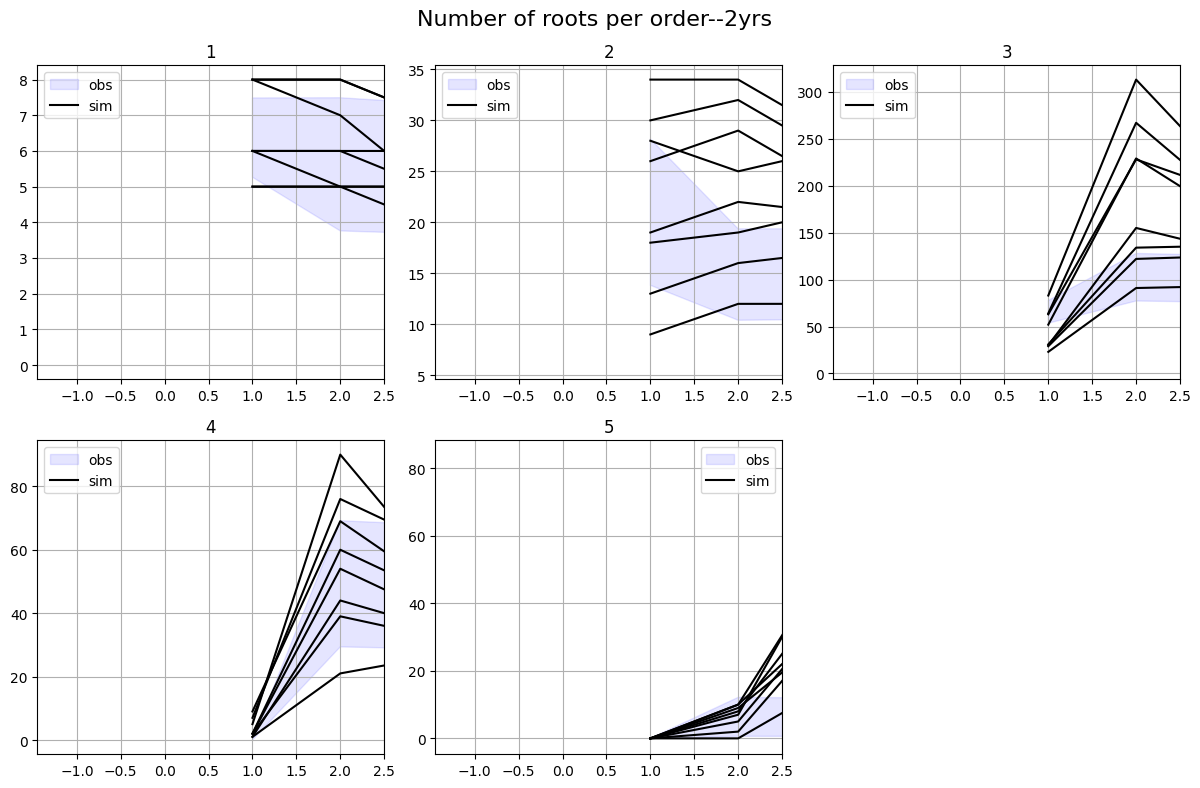

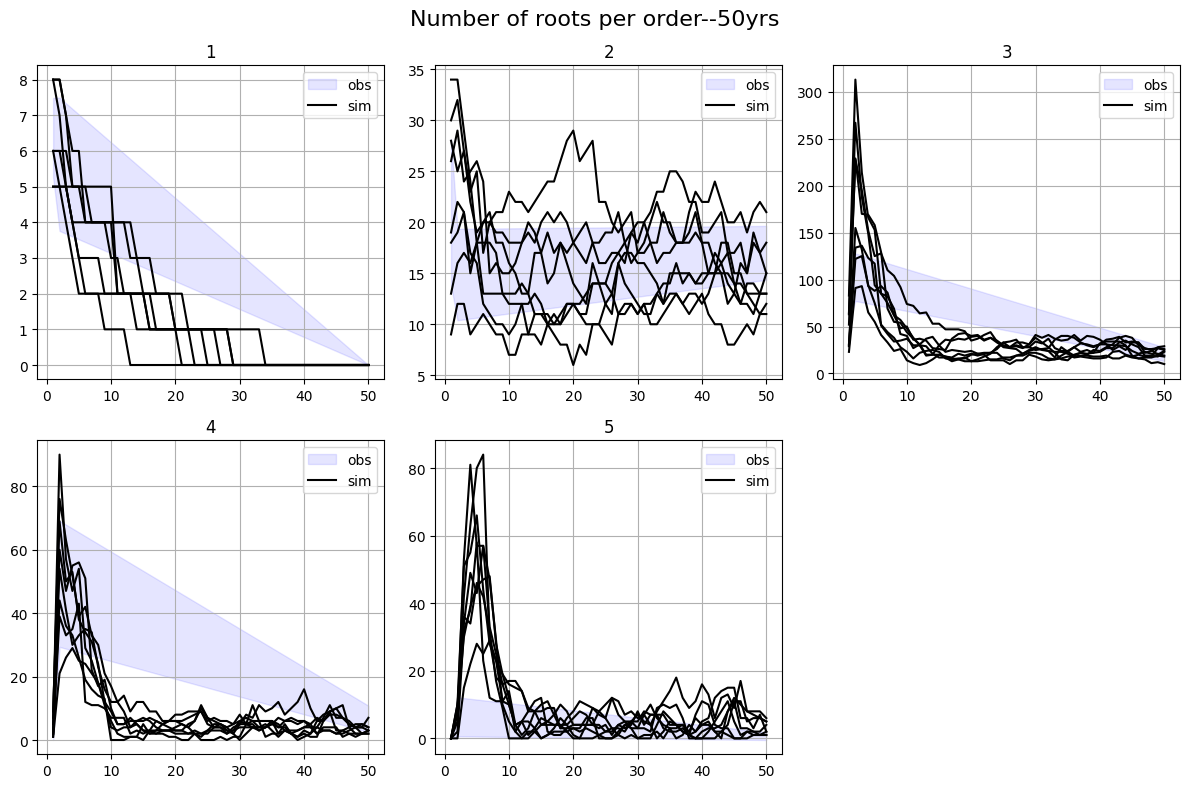

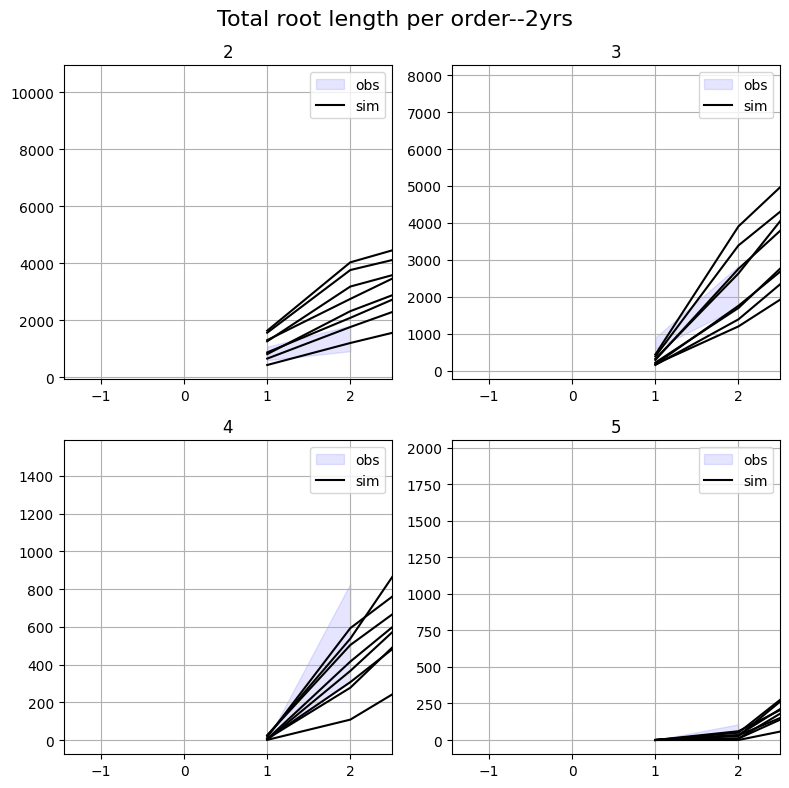

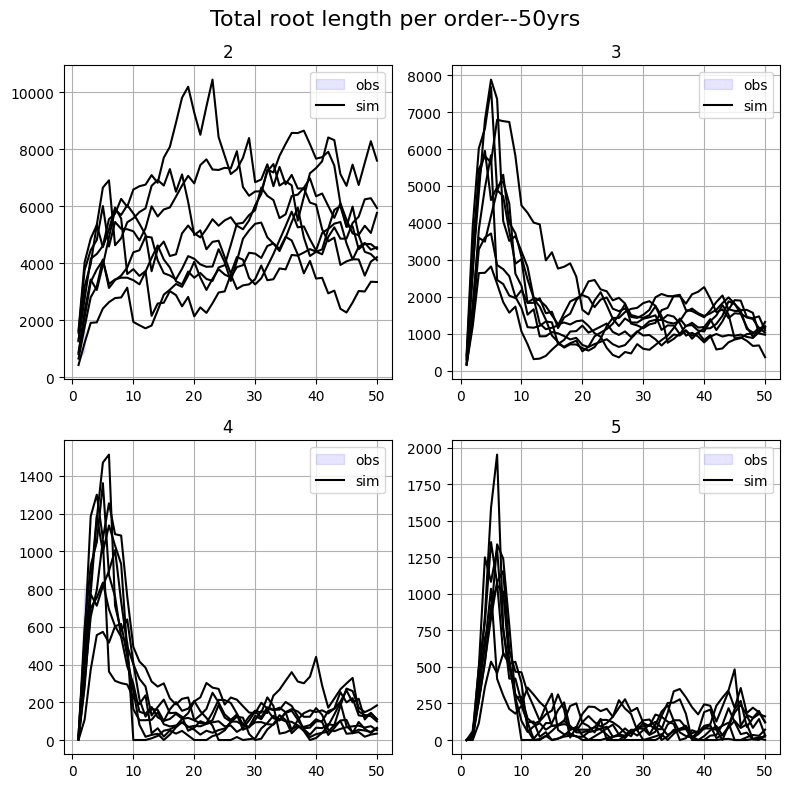

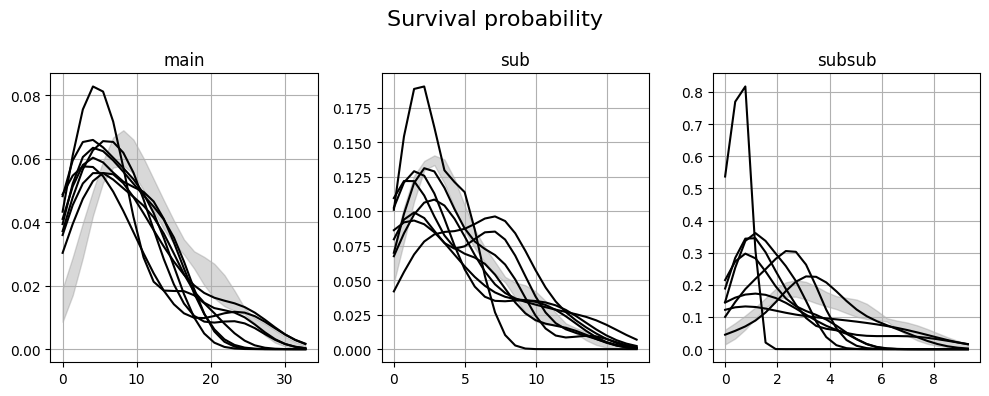

In [61]:
compaireOutPuts('B')

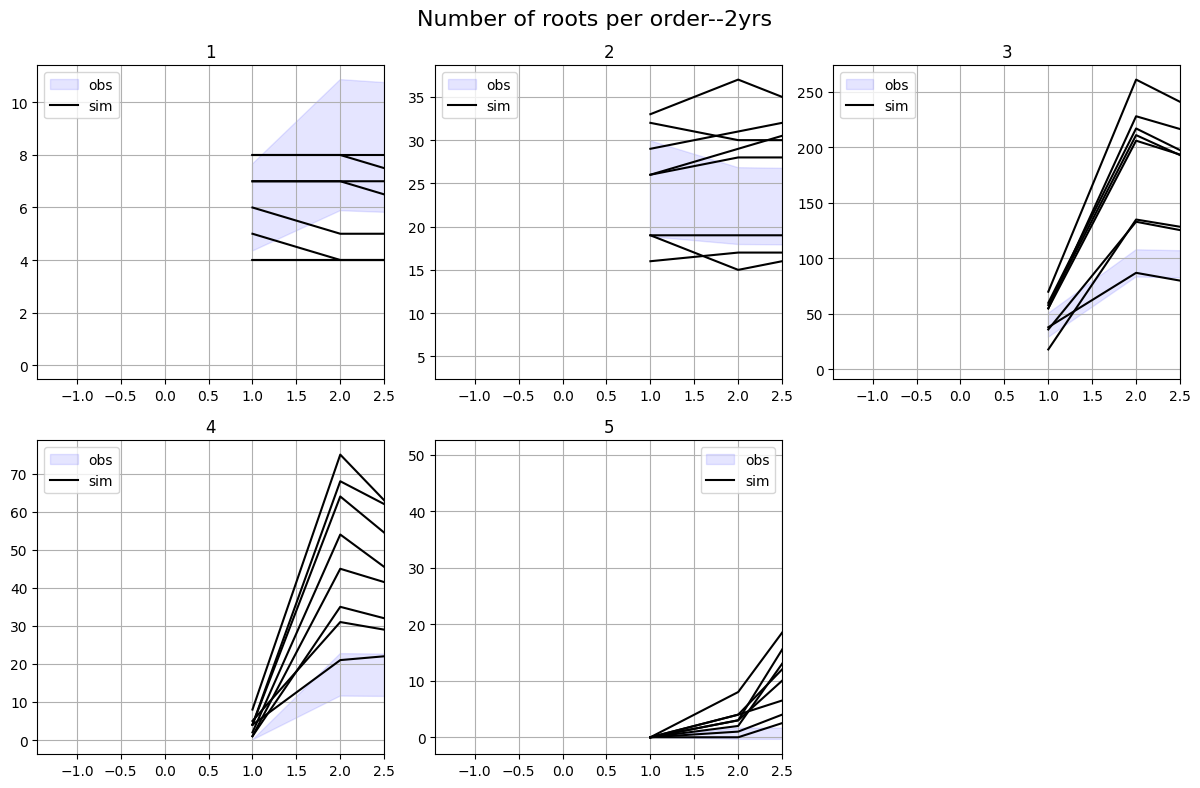

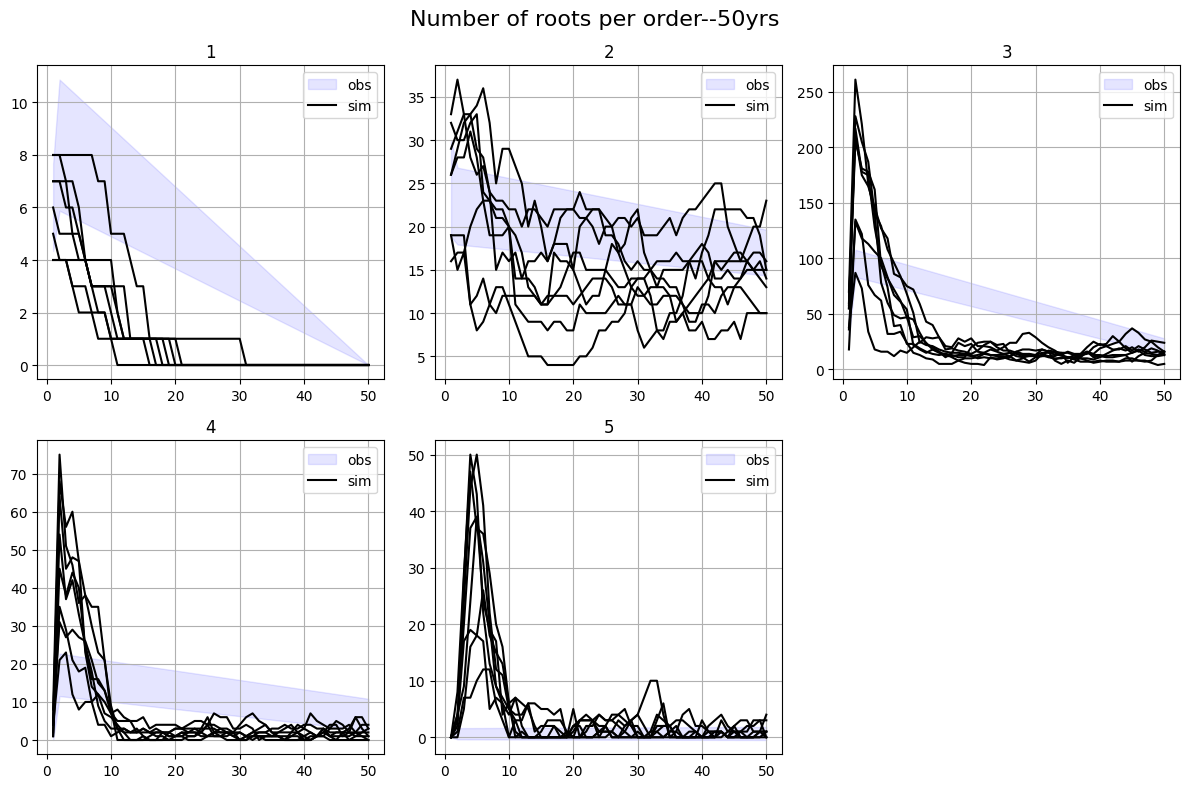

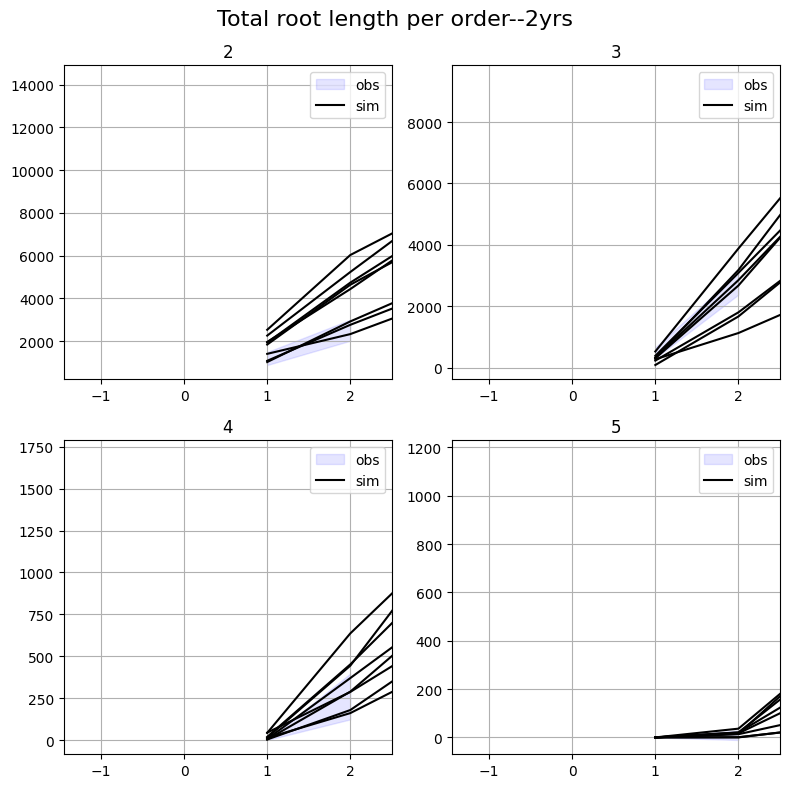

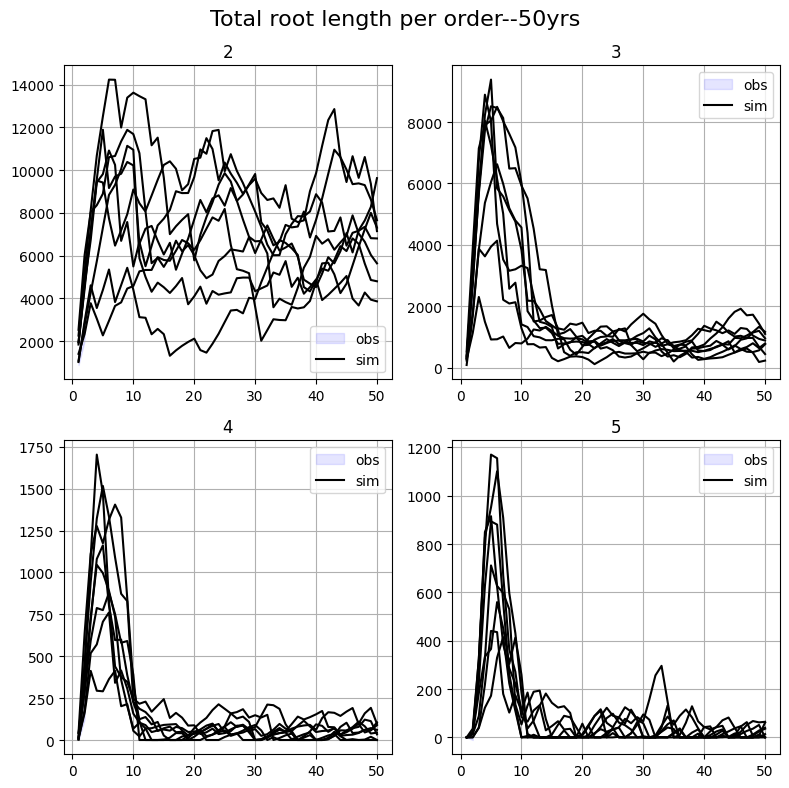

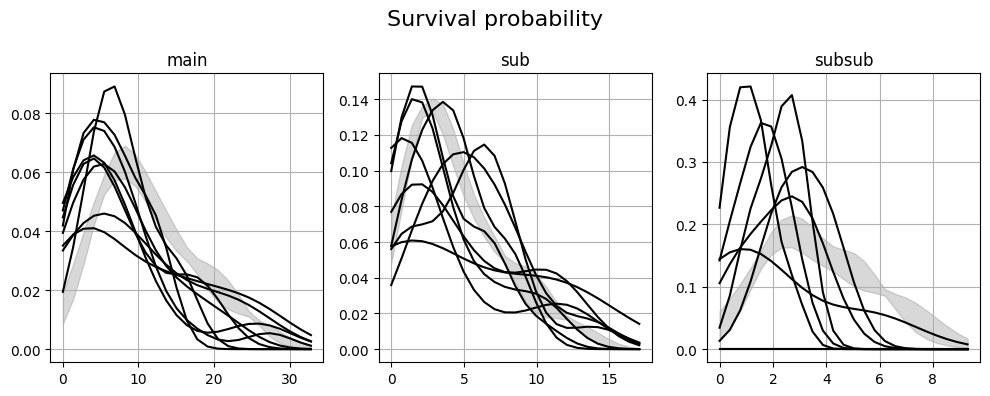

In [62]:
compaireOutPuts('E')

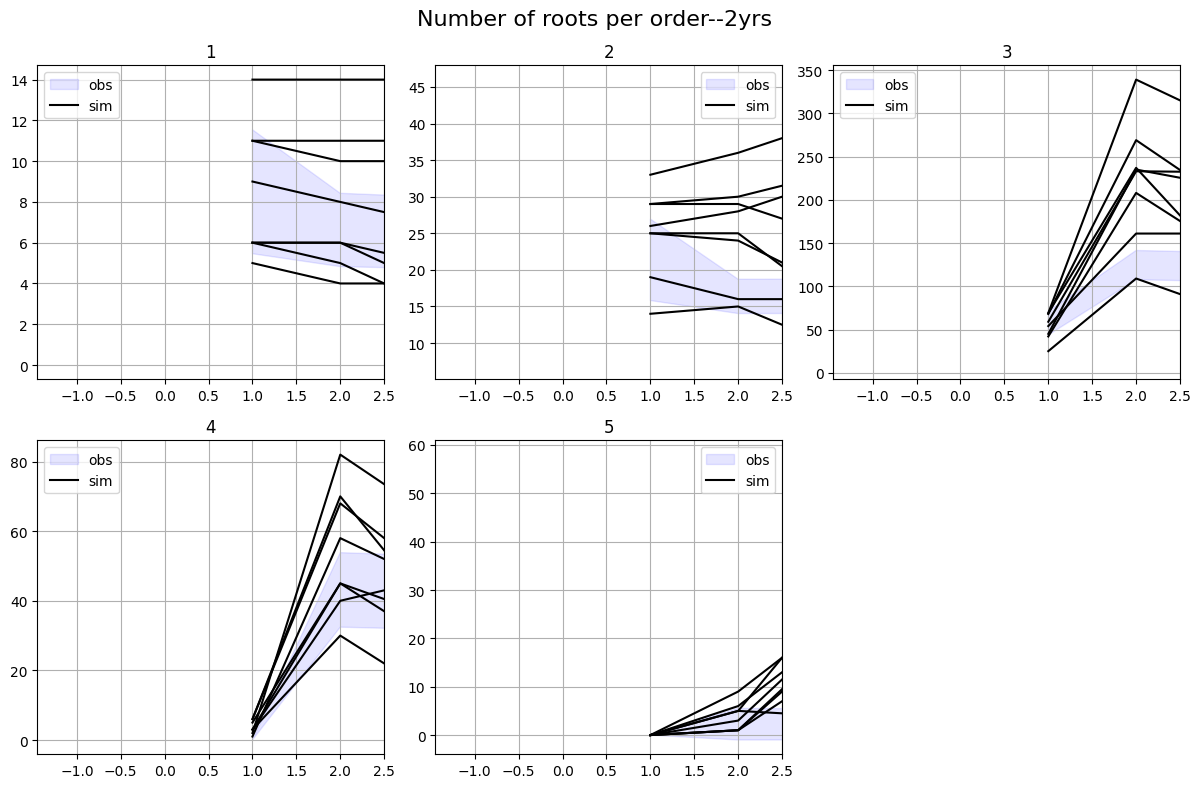

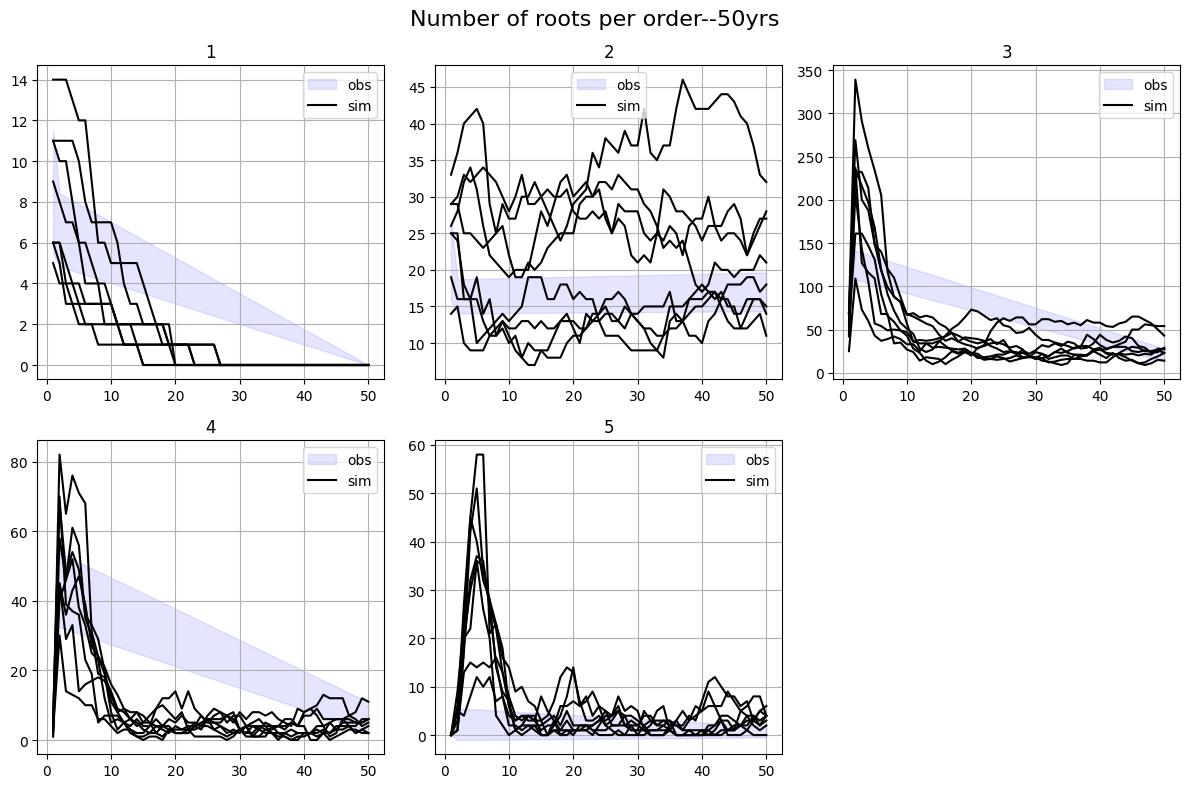

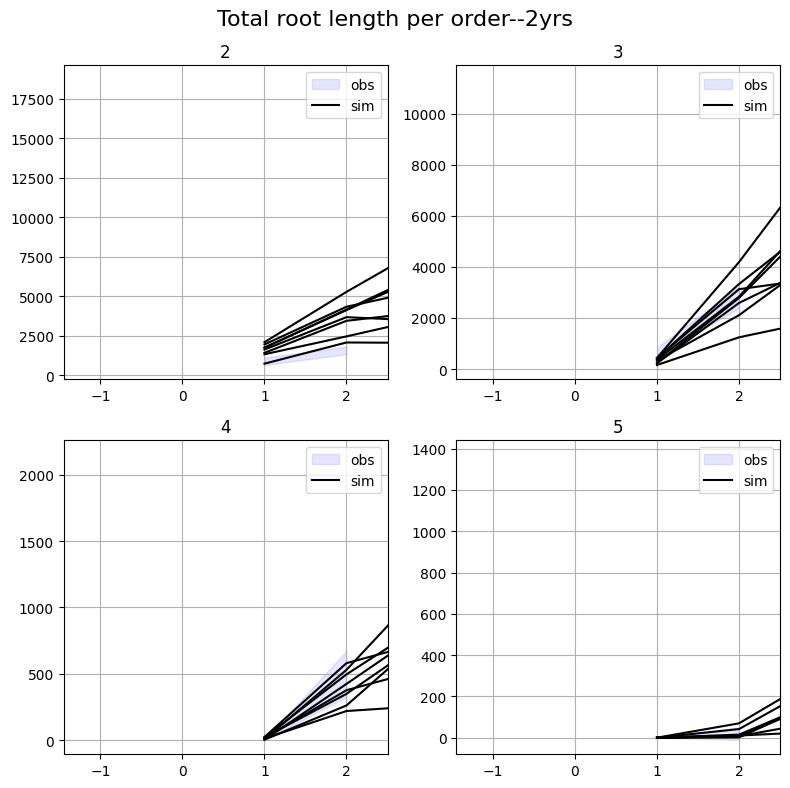

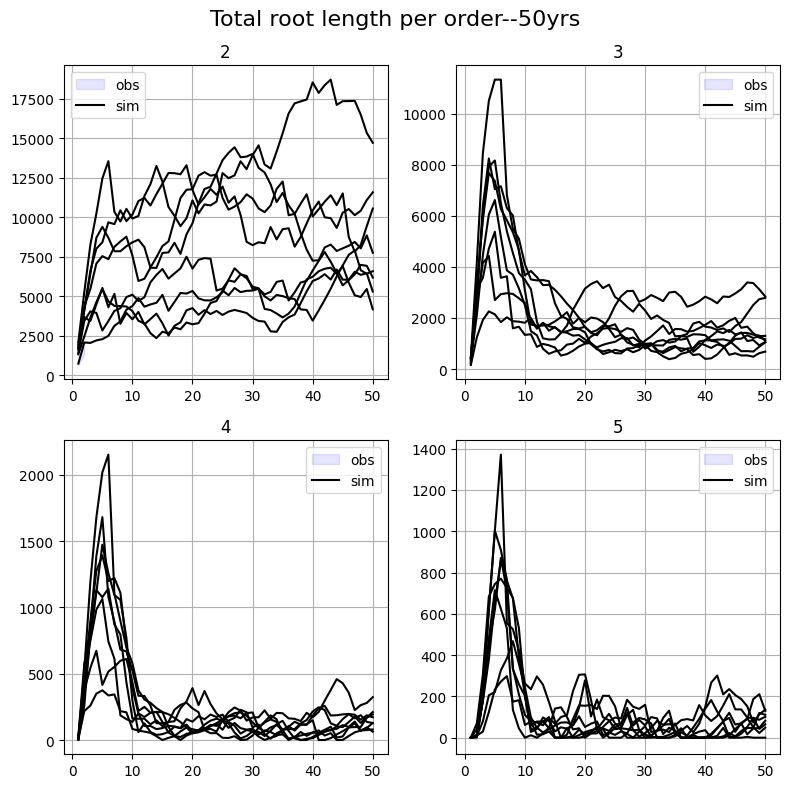

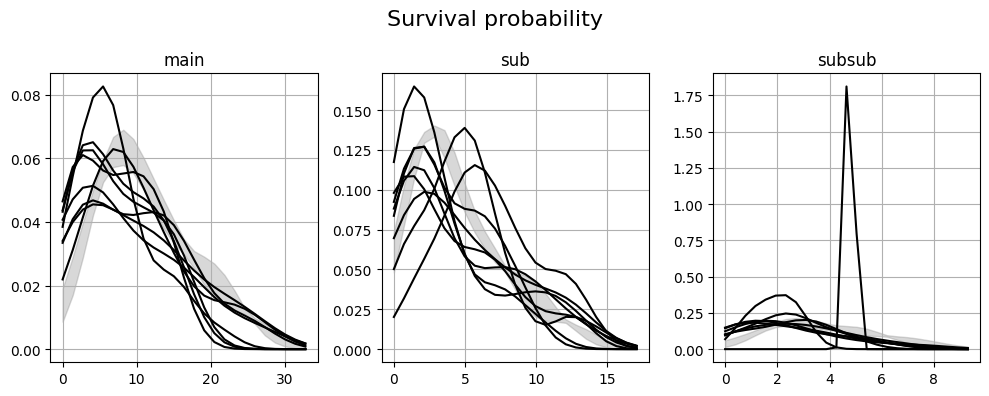

In [63]:
compaireOutPuts('D')

In [ ]:
ratios = [output[0]['year'+str(year+1)]['ratio'] for year in range(50)]


    # axs[2].plot(ages, ratios)
    # axs[2].set_title('ratios')
    plt.tight_layout()
    plt.show()